In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from datetime import datetime

In [2]:
time_start = datetime.now()

resnet_model_avg_pool_features = pd.read_csv('resnet_model_avg_pool_features.csv', sep=',', header=None)

print('This step took time:', datetime.now() - time_start)

This step took time: 0:00:24.273694


In [3]:
resnet_model_avg_pool_features.head()

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.044459,0.015192,0.123056,0.022544,0.014685,0.000000,0.05411,0.000000,0.00000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.033316,0.000000,0.000000
1,0.293910,0.038120,0.647624,0.000000,0.015009,0.000000,0.00000,0.000000,0.00000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.053812,0.000000,0.000000
2,0.517993,0.176398,0.394562,0.059750,0.099761,0.000000,0.00000,0.000000,0.00000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.042720,0.012544,0.126772,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,...,0.002528,0.0,0.07413,0.000000,0.0,0.000000,0.011844,0.000000,0.090980,0.000000
4,0.184237,0.083868,0.667117,0.013950,0.230940,0.029605,0.00000,0.035334,0.00085,0.038493,...,0.055583,0.0,0.00000,0.148272,0.0,0.032973,0.031295,0.000000,0.078041,0.012546


In [4]:
resnet_model_avg_pool_features.shape

(40000, 2048)

In [8]:
time_start = datetime.now()

kmeans = KMeans(n_clusters=20, max_iter=30, random_state=2019)

print('This step took time:', datetime.now() - time_start)

This step took time: 0:00:00


In [9]:
time_start = datetime.now()

kmeans.fit(resnet_model_avg_pool_features.values)

print('This step took time:', datetime.now() - time_start)

This step took time: 0:04:08.559514


In [10]:
time_start = datetime.now()

output = kmeans.predict(resnet_model_avg_pool_features.values)

print('This step took time:', datetime.now() - time_start)

This step took time: 0:00:03.266653


## Identifying Palm Clusters
In this csv file, each row represents a ground observation. And the feature “pix_1” corresponds the column in the image, and “pix_2” corresponds to the row in the image. For example, the first data point has value pix_1 = 8132, pix_2 = 16017, which means its location is 16017th row, and 8132nd column in the image.

In [14]:
lfdp_ground_labels = pd.read_csv("LFDP_ground_labels.csv")
lfdp_ground_labels = lfdp_ground_labels.drop('Unnamed: 0', axis=1)

lfdp_palm = lfdp_ground_labels.loc[(lfdp_ground_labels['SPECIES'] == 'PREMON') & (lfdp_ground_labels['ALIVE'] == 'A')]
lfdp_palm = lfdp_palm[lfdp_palm['DIAM'] >= 20]
lfdp_palm.head()

,Unnamed: 0.1,STEM.TAG,QUAD,SUBQUAD,X,Y,SPECIES,CENSUS,DIAM,ALIVE,coords.x1,coords.x2,pix_1,pix_2
765,484772,6518.0,108,32,11.52,145.91,PREMON,6,20.0,A,265155.806401,254323.465978,8489,11719
2314,486384,17926.0,123,33,14.08,452.41,PREMON,6,20.7,A,265159.451067,254629.114280,8629,2547
3909,488055,171526.0,214,42,35.19,269.20,PREMON,6,20.2,A,265179.882966,254446.367808,9224,8033
4259,488423,14337.0,217,31,30.54,321.37,PREMON,6,20.0,A,265175.424270,254498.403076,9095,6471
4989,489173,17942.0,223,23,26.53,450.48,PREMON,6,20.8,A,265171.877860,254627.164549,9002,2606


In [15]:
palm_num = np.zeros(20)
for index, entry in lfdp_palm.iterrows():
    patch_col = entry['pix_1'] // 100
    patch_row = entry['pix_2'] // 100 

    patches_i = patch_row*200 + patch_col
    palm_num[output[patches_i]] += 1
    
    
cluster_size = np.zeros(20)
for i in range(len(output)):
    cluster_size[output[i]] += 1
    
palm_relevance = palm_num / (cluster_size + 1)
palm_relevance

array([0.00440529, 0.00105319, 0.00180701, 0.00085324, 0.00325415,
       0.0036049 , 0.00439975, 0.00093197, 0.00152964, 0.00130251,
       0.00240577, 0.0005305 , 0.00043422, 0.00146359, 0.        ,
       0.        , 0.00166389, 0.        , 0.01070473, 0.00053333])

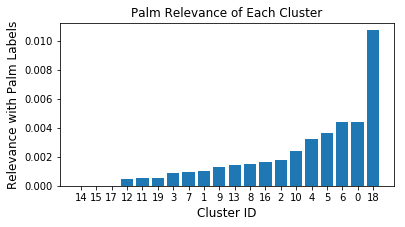

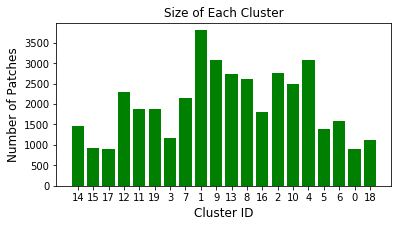

In total, PREMON density is 0.00185


In [16]:
sorted_cluster = np.array(sorted(range(len(palm_relevance)), key=lambda k: palm_relevance[k]), dtype=str)
sorted_palm_relevance = np.sort(palm_relevance)

plt.figure(figsize=(6, 3))
plt.bar(sorted_cluster, sorted_palm_relevance)
plt.title('Palm Relevance of Each Cluster')
plt.xlabel('Cluster ID', fontsize=12)
plt.ylabel('Relevance with Palm Labels', fontsize=12)
plt.show()

plt.figure(figsize=(6, 3))
plt.bar(sorted_cluster, cluster_size[sorted_cluster.astype(int)], color='green')
plt.title('Size of Each Cluster')
plt.xlabel('Cluster ID', fontsize=12)
plt.ylabel('Number of Patches', fontsize=12)
plt.show()

print('In total, PREMON density is', palm_num.sum()/cluster_size.sum())

### Patches in Palm Cluster(s) Visualization
we will visualize top 3 for now

In [17]:
import cv2
from itertools import product

# need to actually get the patches again, so that we can pick the correct patches and stitch them up to create our visualization
img = cv2.imread("shadow_remove.jpg")
patches = [img[i*100:(i+1)*100,j*100:(j+1)*100] for i, j in product(range(int(img.shape[0]/100)), range(int(img.shape[1]/100)))]
patches = np.asarray(patches)

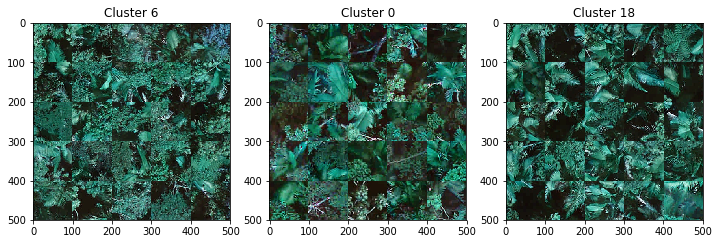

In [18]:
import random

fig = plt.figure(figsize=(12,12)) 

subplot_i = 1
for cluster in sorted_cluster.astype(int)[-3:]:
    # we will view a random 25 patches for each cluster
    indices = [i for i, x in enumerate(output) if x == cluster]
    indices_pos = random.sample(range(len(indices)), 25) # positions of selected elements in indices

    new_img = np.zeros(shape=(500, 500, 3), dtype=int)
    for i in range(5):
        for j in range(5):
            patch_id = i*5 + j # basically acts like a variable that goes from 0 to 24 consecutively
            new_img[i*100:(i+1)*100, j*100:(j+1)*100] = patches[indices[indices_pos[patch_id]],:,:,:]
    
    # let's save the image in the cluster_images folder
    cv2.imwrite('cluster_images/resnet_model_avg_pool_palm_cluster' + str(cluster) + '.jpg', new_img)
    
    fig.add_subplot(1,3,subplot_i), plt.imshow(new_img), plt.title('Cluster ' + str(cluster))
    subplot_i+=1

plt.show()